# Background of the problem

The City of Toronto, is thefinancial capital of Canada and the most populous city. It is diverse and multicultural. Due to the fact it has attracted many different buisness into the market. It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the Canada.
This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. hence, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.


# Problem Statment 

The idea of this study is to help people planning to open a new restaurant in Toronto to choose the right location by providing data about the income and population of each neighborhood as well as the competitors already present on 
the same are regions.


# Data 

Data analysis Process will be done on 'Newyork' City.

We will be using the below datasets for analysing Newyork city

Data 1:  to get the detials of Neighborhood we will be using below link.
Link to the dataset is : https://geo.nyu.edu/catalog/nyu_2451_34572

Data 2: to understand given below points:

Toronto Population
Toronto City Demographics
Cuisine of Toronto city

'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
"http://cocl.us/Geospatial_data/Geospatial_coordinates.csv"

Data 4: Toronto city geographical coordinates data will be utilized as input for the Foursquare API

# Methdology 

Data will be collected, cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by , location,cousines , Most famous, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on locations.

• Finally, the data be will be visually assessed using graphing from various Python libraries.

# Analysis


In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Done!


In [2]:
source = requests.get('https://geo.nyu.edu/catalog/nyu_2451_34572').text

In [3]:
soup = BeautifulSoup(source,'lxml')
My_Table = soup.find('table',{'class':'wikitable sortable'})

In [4]:
URL='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source=requests.get(URL).text

In [5]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(source,'html.parser')
wiki_table=soup.find('table')
df=pd.read_html(str(wiki_table))[0]
df.columns=['PostalCode','Borough','Neighbourhood']
df.head()

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [6]:
df2=df[df['Borough'].str.contains("Not assigned") == False].reset_index()
df2.head()

,index,PostalCode,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
df3=df2.groupby(['PostalCode', 'Borough'])['Neighbourhood'].apply(','.join).reset_index()
df3.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [8]:
df3.shape

(103, 3)

In [9]:
df3.to_csv('Capstone_One')
print('saved')

saved


In [11]:
url="http://cocl.us/Geospatial_data/Geospatial_coordinates.csv"
geo=pd.read_csv(url)
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
geo=geo.rename(columns= {'Postal Code':'PostalCode'})

geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
df3=pd.read_csv('Capstone_One')
df3.head()

,Unnamed: 0,PostalCode,Borough,Neighbourhood
0,0,M1B,Scarborough,"Malvern, Rouge"
1,1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,3,M1G,Scarborough,Woburn
4,4,M1H,Scarborough,Cedarbrae


In [17]:
df4 = pd.merge(df3, geo, on='PostalCode')
df4.head()


,Unnamed: 0,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [18]:
df4.drop(["Unnamed: 0"], axis = 1, inplace=True)
df4.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [19]:
df4.shape

(103, 5)

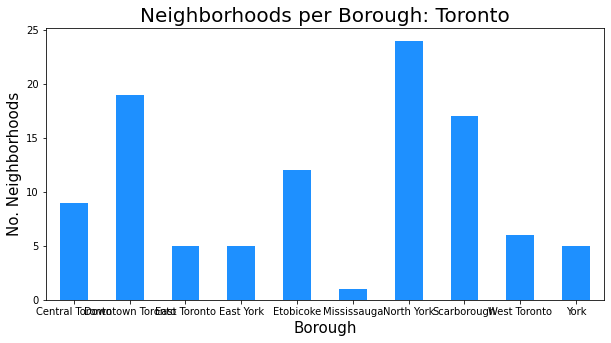

In [20]:
clr = "dodgerblue"
df4.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [21]:
lat2=df4.loc[df4['PostalCode'] == 'M9V']
lat2

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [18]:
df4.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [22]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="coursera_capstone")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(lat_e, long_e))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [23]:
# create map of London using latitude and longitude values
map_toronto = folium.Map(location=[lat_e, long_e], zoom_start=10)
for lat, lng, label in zip(df4['Latitude'], df4['Longitude'], df4['PostalCode']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto) 
map_toronto
    

In [24]:
import random

In [25]:
LIMIT = 200
CLIENT_ID = 'L4113ZLSRADQG1CWL1NLV2XTQHEIPVFQ05FR2A5LPJG214EE' # your Foursquare ID
CLIENT_SECRET = 'UAIS5VUVTU04CTSWKLMVII4DUEKYRKVT1QHF3JYVMEO11PQC' # your Foursquare Secret
VERSION = '20201110' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L4113ZLSRADQG1CWL1NLV2XTQHEIPVFQ05FR2A5LPJG214EE
CLIENT_SECRET:UAIS5VUVTU04CTSWKLMVII4DUEKYRKVT1QHF3JYVMEO11PQC


In [26]:
Neigh_Name=df4.loc[0, 'PostalCode']
Neigh_Name
Neigh_latitude=df4.loc[0, 'Latitude']
Neigh_latitude
Neigh_Longitude=df4.loc[0, 'Longitude']


LIMIT=100
radius=500

In [27]:

# create the API request URL
url ='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_e, long_e, VERSION, radius, LIMIT)

# make the GET request
results = requests.get(url).json() ["response"]['groups'][0]['items']
 # return only relevant information for each nearby venue
results


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5227bb01498e17bf485e6202',
   'name': 'Downtown Toronto',
   'location': {'lat': 43.65323167517444,
    'lng': -79.38529600606677,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.65323167517444,
      'lng': -79.38529600606677}],
    'distance': 113,
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['Toronto ON', 'Canada']},
   'categories': [{'id': '4f2a25ac4b909258e854f55f',
     'name': 'Neighborhood',
     'pluralName': 'Neighborhoods',
     'shortName': 'Neighborhood',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-5227bb01498e17bf485e6202-0'},
 {'reasons': {'count': 0,
   'items': [{'summar

In [41]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories'] 
        
        if len(categories_list) ==0:
            return None
        else:
            return categories_list[0]['name']
        

In [42]:
from pandas.io.json import json_normalize
import json
import urllib.request 
#import urlopen from bs4 import BeautifulSoup 


dataframe = json_normalize(results) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

<ipython-input-42-6b70efb52744>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(results) # flatten JSON


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,neighborhood,id
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,"[{'label': 'display', 'lat': 43.65323167517444...",113,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,NaN,NaN,NaN,5227bb01498e17bf485e6202
1,Nathan Phillips Square,Plaza,43.652270,-79.383516,"[{'label': 'display', 'lat': 43.65227047322295...",138,CA,Toronto,ON,Canada,"[100 Queen St W (at Bay St), Toronto ON M5H 2N...",100 Queen St W,at Bay St,M5H 2N1,NaN,4ad4c05ef964a520a6f620e3
2,Poke Guys,Poke Place,43.654895,-79.385052,"[{'label': 'display', 'lat': 43.65489527525682...",181,CA,Toronto,ON,Canada,"[112 Elizabeth St (at Dundas St W), Toronto ON...",112 Elizabeth St,at Dundas St W,M5G 1P5,NaN,57bcd3b7498e652a678d0378
3,Indigo,Bookstore,43.653515,-79.380696,"[{'label': 'display', 'lat': 43.65351471121164...",260,CA,Toronto,ON,Canada,"[220 Yonge St, Toronto ON M5B 2H1, Canada]",220 Yonge St,NaN,M5B 2H1,Downtown Yonge,4b2a6eb8f964a52012a924e3
4,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684,"[{'label': 'display', 'lat': 43.65554164147378...",237,CA,Toronto,ON,Canada,"[132 Dundas St W (btwn Bay & University), Toro...",132 Dundas St W,btwn Bay & University,M5G 1C3,NaN,4e2284b11fc7c0ef9857d143
5,CF Toronto Eaton Centre,Shopping Mall,43.654447,-79.380952,NaN,263,CA,Toronto,ON,Canada,"[220 Yonge St (btwn Queen & Dundas), Toronto O...",220 Yonge St,btwn Queen & Dundas,M5B 2H1,"Downtown Toronto, Toronto, ON",4ad77a12f964a520260b21e3
6,Old City Hall,Monument / Landmark,43.652009,-79.381744,"[{'label': 'display', 'lat': 43.65200880087612...",240,CA,Toronto,ON,Canada,"[60 Queen Street West, Toronto ON M5H 1A1, Can...",60 Queen Street West,NaN,M5H 1A1,NaN,4ad4c05ef964a5208ef620e3
7,Japango,Sushi Restaurant,43.655268,-79.385165,"[{'label': 'display', 'lat': 43.65526771691681...",222,CA,Toronto,ON,Canada,"[122 Elizabeth St. (at Dundas St. W), Toronto ...",122 Elizabeth St.,at Dundas St. W,M5G 1P5,NaN,4ae7b27df964a52068ad21e3
8,Textile Museum of Canada,Art Museum,43.654396,-79.386500,"[{'label': 'display', 'lat': 43.65439630500274...",230,CA,Toronto,ON,Canada,[55 Centre Avenue (University Ave. and Dundas ...,55 Centre Avenue,University Ave. and Dundas St W.,M5G 2H5,NaN,4ad4c05ef964a520e2f620e3
9,LUSH,Cosmetics Shop,43.653557,-79.380400,"[{'label': 'display', 'lat': 43.653557, 'lng':...",284,CA,Toronto,ON,Canada,"[220 Yonge St, Unit B215-A (in Toronto Eaton C...","220 Yonge St, Unit B215-A",in Toronto Eaton Centre,M5B 2H1,NaN,4bd0b30d41b9ef3b8fa0fae5


In [47]:
dataframe_filtered.groupby('categories')
#dataframe_filtered.head(10)

print('There are {} uniques categories.'.format(len(dataframe_filtered['categories'].unique())))
Toronto_restaurants = dataframe_filtered[dataframe_filtered['categories'].str.contains("Restaurant")]
Toronto_restaurants.head()

There are 63 uniques categories.


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,neighborhood,id
7,Japango,Sushi Restaurant,43.655268,-79.385165,"[{'label': 'display', 'lat': 43.65526771691681...",222,CA,Toronto,ON,Canada,"[122 Elizabeth St. (at Dundas St. W), Toronto ...",122 Elizabeth St.,at Dundas St. W,M5G 1P5,NaN,4ae7b27df964a52068ad21e3
13,Crepe Delicious,Fast Food Restaurant,43.654536,-79.380889,"[{'label': 'display', 'lat': 43.65453648827724...",271,CA,Toronto,ON,Canada,"[220 Yonge St., Toronto ON M5B 2H1, Canada]",220 Yonge St.,NaN,M5B 2H1,NaN,4e5d8181a8092f63968617ee
20,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501,"[{'label': 'display', 'lat': 43.65515746756124...",278,CA,Toronto,ON,Canada,[179 Dundas St. W (btwn Centre Ave. & Chestnut...,179 Dundas St. W,btwn Centre Ave. & Chestnut St.,M5G 1Z8,NaN,504bbf2ce4b0168121235cbe
21,The Keg Steakhouse + Bar - York Street,Restaurant,43.649987,-79.384103,"[{'label': 'display', 'lat': 43.64998659318569...",389,CA,Toronto,ON,Canada,[165 York St (btwn Richmond St. & Adelaide St....,165 York St,btwn Richmond St. & Adelaide St.,M5H 3R8,NaN,4ad69511f964a520e40721e3
25,John & Sons Oyster House,Seafood Restaurant,43.650656,-79.381613,"[{'label': 'display', 'lat': 43.65065642537144...",365,CA,Toronto,ON,Canada,"[56 Temperance Street, Toronto ON M5H 3V5, Can...",56 Temperance Street,NaN,M5H 3V5,NaN,50ecb1fae4b0beb13294f0aa


In [95]:
Toronto_onehot = pd.get_dummies(Toronto_restaurants[['categories']], prefix="", prefix_sep="")

# add name column back to dataframe
Toronto_onehot['postalCode'] = Toronto_restaurants['postalCode'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,postalCode,American Restaurant,Colombian Restaurant,Fast Food Restaurant,Japanese Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
7,M5G 1P5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13,M5B 2H1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20,M5G 1Z8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21,M5H 3R8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,M5H 3V5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
print('There are {} restaurants in Toronto with {} different style of cuisines.'.format(Toronto_onehot.shape[0],(Toronto_onehot.shape[1]-1)))

There are 22 restaurants in Toronto with 16 different style of cuisines.


In [66]:
Toronto_grouped = Toronto_onehot.groupby('postalCode').mean().reset_index()
Toronto_grouped

,postalCode,American Restaurant,Colombian Restaurant,Fast Food Restaurant,Japanese Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,M5B 0A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,M5B 1N8,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,M5B 1R7,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
3,M5B 2G9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,M5B 2H1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,M5C 2L7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,M5G 1H1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,M5G 1P5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,M5G 1Z3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,M5G 1Z4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
Toronto_grouped.shape

(19, 17)

In [68]:
num_top_rest = 3

for hood in Toronto_grouped['postalCode']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['postalCode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_rest))
    print('\n')

----M5B 0A1----
                  venue  freq
0            Restaurant   1.0
1   American Restaurant   0.0
2  Colombian Restaurant   0.0


----M5B 1N8----
                       venue  freq
0  Middle Eastern Restaurant   0.5
1      Vietnamese Restaurant   0.5
2        American Restaurant   0.0


----M5B 1R7----
                 venue  freq
0   Mexican Restaurant   0.5
1      Thai Restaurant   0.5
2  American Restaurant   0.0


----M5B 2G9----
                  venue  freq
0      Sushi Restaurant   1.0
1   American Restaurant   0.0
2  Colombian Restaurant   0.0


----M5B 2H1----
                  venue  freq
0  Fast Food Restaurant   1.0
1   American Restaurant   0.0
2  Colombian Restaurant   0.0


----M5C 2L7----
                       venue  freq
0  Latin American Restaurant   1.0
1        American Restaurant   0.0
2       Colombian Restaurant   0.0


----M5G 1H1----
                        venue  freq
0  Modern European Restaurant   1.0
1         American Restaurant   0.0
2        Col

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalCodes_venues_sorted = pd.DataFrame(columns=columns)
postalCodes_venues_sorted['postalCode'] = Toronto_grouped['postalCode']


for ind in np.arange(Toronto_grouped.shape[0]):
    postalCodes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

postalCodes_venues_sorted.head()

,postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5B 0A1,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
1,M5B 1N8,Vietnamese Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant
2,M5B 1R7,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant
3,M5B 2G9,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
4,M5B 2H1,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant


In [72]:
# Creating new dataframe to determine best k value by dropping first column
Toronto_clustering_testing = Toronto_grouped.drop('postalCode', 1)

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  retu

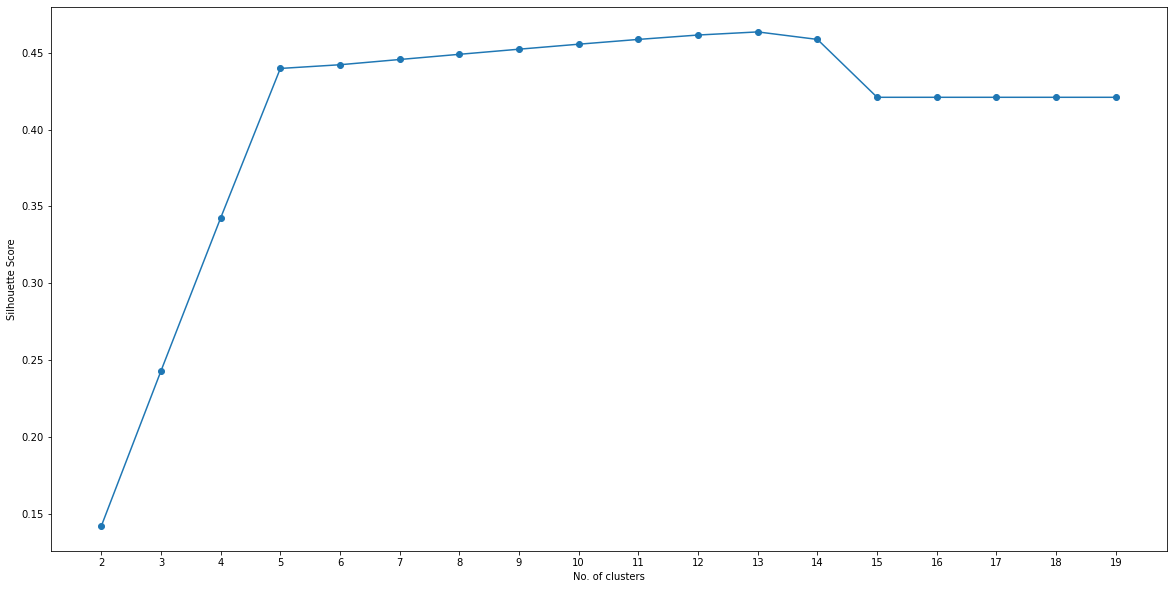

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 20

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = Toronto_clustering_testing
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [76]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

13

In [77]:
# set number of clusters
kclusters = opt

Toronto_grouped_clustering = Toronto_grouped.drop('postalCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 3,  5,  4,  1, 12,  9, 11,  1,  8,  5])

In [84]:
# add clustering labels
postalCodes_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_restaurants

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('postalCode'), on='postalCode')
Toronto_merged.fillna(0)
Toronto_merged.head() # check the last columns!

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Japango,Sushi Restaurant,43.655268,-79.385165,"[{'label': 'display', 'lat': 43.65526771691681...",222,CA,Toronto,ON,Canada,...,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
13,Crepe Delicious,Fast Food Restaurant,43.654536,-79.380889,"[{'label': 'display', 'lat': 43.65453648827724...",271,CA,Toronto,ON,Canada,...,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant
20,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501,"[{'label': 'display', 'lat': 43.65515746756124...",278,CA,Toronto,ON,Canada,...,Ramen Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
21,The Keg Steakhouse + Bar - York Street,Restaurant,43.649987,-79.384103,"[{'label': 'display', 'lat': 43.64998659318569...",389,CA,Toronto,ON,Canada,...,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
25,John & Sons Oyster House,Seafood Restaurant,43.650656,-79.381613,"[{'label': 'display', 'lat': 43.65065642537144...",365,CA,Toronto,ON,Canada,...,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant


In [85]:
Toronto_merged['Cluster Labels'].value_counts()

5.0     3
4.0     3
8.0     2
2.0     2
3.0     2
1.0     2
0.0     1
9.0     1
10.0    1
11.0    1
7.0     1
6.0     1
12.0    1
Name: Cluster Labels, dtype: int64

In [103]:

# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Toronto_merged['lat'], 
                                   Toronto_merged['lng'], 
                                   Toronto_merged['neighborhood'], 
                                   Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#5641fd', '#2c7ef7', '#00b5eb', '#2adddd', '#54f6cb', '#80ffb4', '#abf69b', '#d4dd80', '#ffb360', '#ff7e41', '#ff4121', '#ff0000']


In [106]:
c2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[0]+list(range(8, Toronto_merged.shape[1]))]]
c2.head()

,name,state,country,formattedAddress,address,crossStreet,postalCode,neighborhood,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Japango,ON,Canada,"[122 Elizabeth St. (at Dundas St. W), Toronto ...",122 Elizabeth St.,at Dundas St. W,M5G 1P5,NaN,4ae7b27df964a52068ad21e3,1.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
82,Spring Sushi,ON,Canada,"[10 Dundas St. E (at Yonge St.), Toronto ON M5...",10 Dundas St. E,at Yonge St.,M5B 2G9,NaN,4fe4a773e4b0ef61f5212ecd,1.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Seafood Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant


In [113]:
c2_table = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Toronto_merged.shape[1]))]]
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Toronto_merged['lat'], 
                                   Toronto_merged['lng'], 
                                   Toronto_merged['neighborhood'], 
                                   Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#5641fd', '#2c7ef7', '#00b5eb', '#2adddd', '#54f6cb', '#80ffb4', '#abf69b', '#d4dd80', '#ffb360', '#ff7e41', '#ff4121', '#ff0000']


In [114]:
c3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[0]+list(range(8, Toronto_merged.shape[1]))]]
c3.head()

,name,state,country,formattedAddress,address,crossStreet,postalCode,neighborhood,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,John & Sons Oyster House,ON,Canada,"[56 Temperance Street, Toronto ON M5H 3V5, Can...",56 Temperance Street,NaN,M5H 3V5,NaN,50ecb1fae4b0beb13294f0aa,2.0,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
36,Red Lobster,ON,Canada,"[20 Dundas Street West (at Bay St), Toronto ON...",20 Dundas Street West,at Bay St,M5G 2C2,NaN,4ae3398ff964a520ed9121e3,2.0,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant


In [115]:
c3_table = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Toronto_merged.shape[1]))]]
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Toronto_merged['lat'], 
                                   Toronto_merged['lng'], 
                                   Toronto_merged['neighborhood'], 
                                   Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#5641fd', '#2c7ef7', '#00b5eb', '#2adddd', '#54f6cb', '#80ffb4', '#abf69b', '#d4dd80', '#ffb360', '#ff7e41', '#ff4121', '#ff0000']


In [116]:
c4 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[0]+list(range(8, Toronto_merged.shape[1]))]]
c4.head()

,name,state,country,formattedAddress,address,crossStreet,postalCode,neighborhood,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,The Keg Steakhouse + Bar - York Street,ON,Canada,[165 York St (btwn Richmond St. & Adelaide St....,165 York St,btwn Richmond St. & Adelaide St.,M5H 3R8,NaN,4ad69511f964a520e40721e3,3.0,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant
74,Jack Astor's Bar & Grill,ON,Canada,"[10 Dundas St. E (at Yonge St.), Toronto ON M5...",10 Dundas St. E,at Yonge St.,M5B 0A1,NaN,4ad9ffbbf964a520091d21e3,3.0,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Ramen Restaurant,New American Restaurant,Modern European Restaurant,Middle Eastern Restaurant


In [117]:
c4_table = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Toronto_merged.shape[1]))]]
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Toronto_merged['lat'], 
                                   Toronto_merged['lng'], 
                                   Toronto_merged['neighborhood'], 
                                   Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#5641fd', '#2c7ef7', '#00b5eb', '#2adddd', '#54f6cb', '#80ffb4', '#abf69b', '#d4dd80', '#ffb360', '#ff7e41', '#ff4121', '#ff0000']


# Results

|  Cluster   |  Most Common Restaurant    |  Least Common Restaurant   | 2nd Least Common Restaurant   | |
|---:|:-------------|:-----------|:------|:------|
| 1 | Fastfood  | Middle Eastern      | Modern European   
| 2 | Sushi  | Middle Eastern   | Modern European  
| 3 | Seafood  | Middle Eastern   | Modern European 
| 4 | Restuarent  | Middle Eastern   | Modern European 



# Conclusion

If a company want to open a restaurant with a preferred cuisine and irrespective of location, refer to the cluster with the least number of restaurants with that specific cuisine and select one among the neighborhoods based on company’s preference.

This analysis is performed on limited data. This may be right or may be wrong. But if good amount of data is available there is scope to come up with better results. If there are lot of restaurants probably there is lot of demand. 